<a href="https://colab.research.google.com/github/nkorzounUD/DSPS_NKorzoun/blob/main/HW5/fitmodeltodata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Prepared by Andrew Crossman @AndrewCrossman, Ben Flaggs @bflaggs, Nik Korzoun @nkorzounUD, Connor Mooney @comooney711

# Importing data

In [1]:
import numpy as np
import scipy as sp
from scipy import stats
import matplotlib.pylab as plt
import pandas as pd
%pylab inline
from IPython.display import HTML

Populating the interactive namespace from numpy and matplotlib


/Users/home/miniconda3/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [2]:
# Read csv
data = pd.read_csv("https://raw.githubusercontent.com/fedhere/DSPS_FBianco/master/HW5/hbl2017.csv",sep=",")

# Rename columns
data = data[['#ID','x','y','σy', 'σx', 'ρxy']].rename(
    {'#ID':'ID','x':'x','y':'y','σy':'yerr', 'σx':'xerr', 'ρxy':'corr'}, axis=1)

# Change all data in the dataframe to floats
data = data.astype(float)
data

,ID,x,y,yerr,xerr,corr
0,1.0,201.0,592.0,61.0,9.0,-0.84
1,2.0,244.0,401.0,25.0,4.0,0.31
2,3.0,47.0,583.0,38.0,11.0,0.64
3,4.0,287.0,402.0,15.0,7.0,-0.27
4,5.0,203.0,495.0,21.0,5.0,-0.33
5,6.0,58.0,173.0,15.0,9.0,0.67
6,7.0,210.0,479.0,27.0,4.0,-0.02
7,8.0,202.0,504.0,14.0,4.0,-0.05
8,9.0,198.0,510.0,30.0,11.0,-0.84
9,10.0,158.0,416.0,16.0,7.0,-0.69


# Exercise 1

In [3]:
# only interested in points 5-20
e1 = data[data.ID>4]
e1.head()
#e1.tail()

,ID,x,y,yerr,xerr,corr
4,5.0,203.0,495.0,21.0,5.0,-0.33
5,6.0,58.0,173.0,15.0,9.0,0.67
6,7.0,210.0,479.0,27.0,4.0,-0.02
7,8.0,202.0,504.0,14.0,4.0,-0.05
8,9.0,198.0,510.0,30.0,11.0,-0.84


Least-squares estimates:
m = 2.24 ± 0.11
b = 34 ± 18


/Users/home/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  


Text(100, 200, 'y = (2.24 ± 0.11) x + (34 ± 18)')

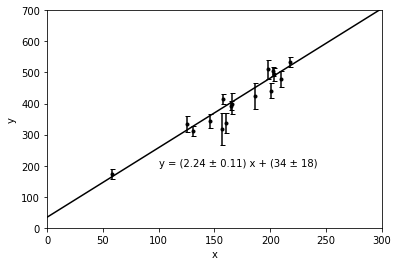

In [4]:
# plot data
plt.errorbar(e1['x'], e1['y'], yerr=e1['yerr'], fmt=".k", capsize=2.5)

# set up matrices
A = np.vander(e1['x'], 2) 
ATA = np.dot(A.T, A / (e1['yerr'] ** 2)[:, None])
cov = np.linalg.inv(ATA) #covariance will give us the errors

# linear algebra solution
m = np.linalg.solve(ATA, np.dot(A.T, e1['y'] / e1['yerr'] ** 2))
print("Least-squares estimates:")
print("m = {0:.2f} ± {1:.2f}".format(m[0], np.sqrt(cov[0, 0])))
print("b = {0:.0f} ± {1:.0f}".format(m[1], np.sqrt(cov[1, 1])))

# plot linear algebra solution
x0 = np.linspace(0, 300)
plt.plot(x0, m[0] * x0 + m[1], "k")
plt.xlim(0, 300)
plt.ylim(0, 700)
plt.xlabel("x")
plt.ylabel("y")
plt.text(100,200, "y = (2.24 ± 0.11) x + (34 ± 18)")

In [5]:
A = np.vander(e1['x'], 2) 
ATA = np.dot(A.T, A / (e1['yerr'] ** 2)[:, None])
cov = np.linalg.inv(ATA)
cov

/Users/home/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  


array([[ 1.16166311e-02, -1.88954491e+00],
       [-1.88954491e+00,  3.32922601e+02]])

## Figure 1:
### Plot of data points 5-20 in Table 1 of (Hogg, Bovy, Lang 2017). A fit is performed using linear algebra, and we find the solution $y = (2.24 ± 0.11) x + (34 ± 18)$. Thus, the standard uncertainty variance on the slope of the line, $σ_m^2$, is $(0.11^2) = 0.01$.

# Exercise 2

In [6]:
# now we are interested in all points
e2 = data
e2.head()

,ID,x,y,yerr,xerr,corr
0,1.0,201.0,592.0,61.0,9.0,-0.84
1,2.0,244.0,401.0,25.0,4.0,0.31
2,3.0,47.0,583.0,38.0,11.0,0.64
3,4.0,287.0,402.0,15.0,7.0,-0.27
4,5.0,203.0,495.0,21.0,5.0,-0.33


Least-squares estimates:
m = 1.08 ± 0.08
b = 213 ± 14


/Users/home/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  


Text(100, 200, 'y = (1.008 ± 0.08) x + (213 ± 14)')

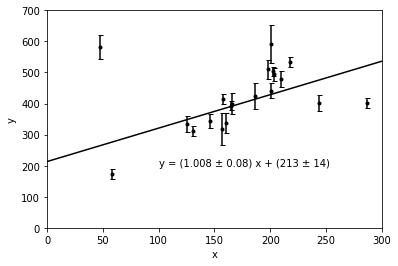

In [7]:
# plot data
plt.errorbar(e2['x'], e2['y'], yerr=e2['yerr'], fmt=".k", capsize=2.5)

# set up matrices
A = np.vander(e2['x'], 2) 
ATA = np.dot(A.T, A / (e2['yerr'] ** 2)[:, None])
cov = np.linalg.inv(ATA) #covariance will give us the errors

# linear algebra solution
m = np.linalg.solve(ATA, np.dot(A.T, e2['y'] / e2['yerr'] ** 2))
print("Least-squares estimates:")
print("m = {0:.2f} ± {1:.2f}".format(m[0], np.sqrt(cov[0, 0])))
print("b = {0:.0f} ± {1:.0f}".format(m[1], np.sqrt(cov[1, 1])))

# plot linear algebra solution
x0 = np.linspace(0, 300)
plt.plot(x0, m[0] * x0 + m[1], "k")
plt.xlim(0, 300)
plt.ylim(0, 700)
plt.xlabel("x")
plt.ylabel("y")
plt.text(100,200, "y = (1.008 ± 0.08) x + (213 ± 14)")

## Figure 2:
### Plot of all data points in Table 1 of (Hogg, Bovy, Lang 2017). A fit is performed using linear algebra, and we find the solution $y = (1.008 ± 0.08) x + (213 ± 14)$. Thus, the standard uncertainty variance on the slope of the line, $σ_m^2$, is $(0.08^2) = 0.006$. The uncertainty on the slope of the line is smaller with the new included data points, but the new included points are outliers. These outliers have more significance on the result of the fit as they perhaps should.

# Exercise 3

In [9]:
# only interested in points 5-20
e3 = e1
e3.head()
#e3.tail()

,ID,x,y,yerr,xerr,corr
4,5.0,203.0,495.0,21.0,5.0,-0.33
5,6.0,58.0,173.0,15.0,9.0,0.67
6,7.0,210.0,479.0,27.0,4.0,-0.02
7,8.0,202.0,504.0,14.0,4.0,-0.05
8,9.0,198.0,510.0,30.0,11.0,-0.84


Least-squares estimates:
q = 0.0023 ± 0.0020
m = 1.60 ± 0.58
b = 73 ± 39


/Users/home/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  


Text(20, 50, 'y = (0.0023 ± 0.0020) x$^2$ + (1.60 ± 0.58) x + (73 ± 39)')

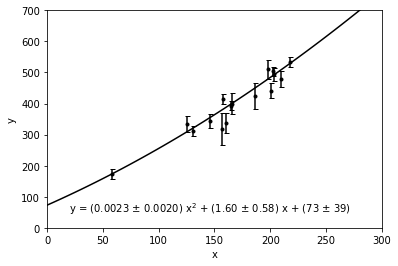

In [10]:
# plot data
plt.errorbar(e3['x'], e3['y'], yerr=e3['yerr'], fmt=".k", capsize=2.5)

# set up matrices
A = np.vander(e3['x'], 3) 
ATA = np.dot(A.T, A / (e3['yerr'] ** 2)[:, None])
cov = np.linalg.inv(ATA) #covariance will give us the errors

# linear algebra solution
m = np.linalg.solve(ATA, np.dot(A.T, e3['y'] / e3['yerr'] ** 2))
print("Least-squares estimates:")
print("q = {0:.4f} ± {1:.4f}".format(m[0], np.sqrt(cov[0, 0])))
print("m = {0:.2f} ± {1:.2f}".format(m[1], np.sqrt(cov[1, 1])))
print("b = {0:.0f} ± {1:.0f}".format(m[2], np.sqrt(cov[2, 2])))

# plot linear algebra solution
x0 = np.linspace(0, 300)
plt.plot(x0, m[0] * x0**2 + m[1] * x0 + m[2], "k")
plt.xlim(0, 300)
plt.ylim(0, 700)
plt.xlabel("x")
plt.ylabel("y")
plt.text(20,50, r"y = (0.0023 ± 0.0020) x$^2$ + (1.60 ± 0.58) x + (73 ± 39)")

## Figure 3:
### Plot of data points 5-20 in Table 1 of (Hogg, Bovy, Lang 2017). A quadratic fit is performed using linear algebra, and we find the solution $y = (0.0023 ± 0.0020) x^2 + (1.60 ± 0.58) x + (73 ± 39)$. Thus, the standard uncertainty variance on the linear power of x (the "slope" of the line), $σ_m^2$, is $(0.58^2) = 0.34$.

# Exercise 4

In [22]:
display(HTML('''
<img src = "https://drive.google.com/uc?id=1MQ4TqUuwL3ZI7HJnbNq3Pt76_u0UP6ht" width = "40%" />
'''))

# Exercise 5 (Extra Credit)

In [23]:
display(HTML('''
<img src = "https://drive.google.com/uc?id=1U9ozlxWTKzSgDNk3YX-NQrXqSApcIzNq" width = "40%" />
'''))

---

<h1 style="color:red"> Awesome !</h1>
